In [1]:
%matplotlib inline
!python -V

Python 3.7.6


In [2]:
# import necessary Python packages
import os
import numpy as np
import urllib.request

# print message after packages imported successfully
print("import of packages successful")
os.getcwd()
os.chdir("E:/nvtng/Projects/GitHub/umap-explorer/data/")


import of packages successful


In [32]:
data = np.loadtxt(fname = "hpcc.csv",delimiter=',')
print(data)
f = open('hpcc_color.txt', 'r')
data_color = f.read().splitlines()
f.close()

[[0.56842105 0.43157895 0.17894737 ... 0.525      0.53333333 0.4515625 ]
 [0.74736842 0.56842105 0.17894737 ... 0.525      0.53333333 0.5109375 ]
 [0.56842105 0.45263158 0.14736842 ... 0.48333333 0.48333333 0.3921875 ]
 ...
 [0.75789474 0.52631579 0.12631579 ... 0.44583333 0.44583333 0.4515625 ]
 [0.62105263 0.43157895 0.12631579 ... 0.54583333 0.54583333 0.440625  ]
 [0.66315789 0.50526316 0.12631579 ... 0.54583333 0.55       0.459375  ]]



UMAP on the MNIST Digits dataset
--------------------------------

A simple example demonstrating how to use UMAP on a larger
dataset such as MNIST. We first pull the MNIST dataset and
then use UMAP to reduce it to only 2-dimensions for
easy visualisation.

Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
import numba
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore', numba.errors.NumbaDeprecationWarning)

    
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [14]:
# np.random.seed(42)
# data = np.random.rand(800, 9)
print(data[0,:])

In [19]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

Wall time: 1.64 s


[[-0.05991949 -3.529248  ]
 [ 1.7215589   5.483679  ]
 [-1.1561166  -4.3669434 ]
 ...
 [ 1.6063961  -6.230315  ]
 [ 0.19875886 -3.4359758 ]
 [ 0.36912963 -3.5829525 ]]


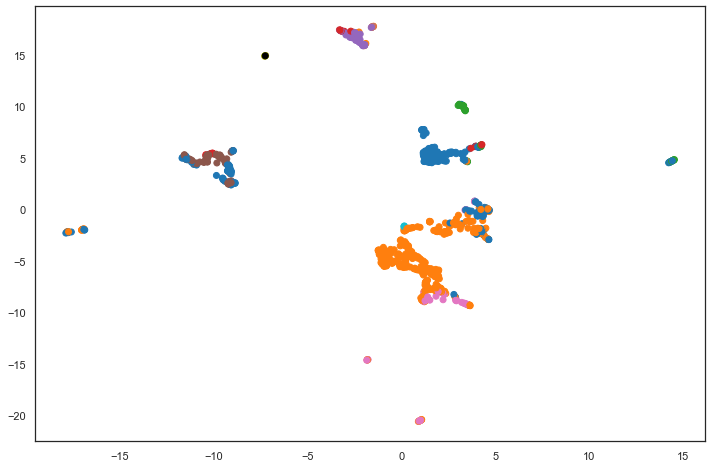

In [24]:
print(u)
# plt.scatter(u[:,0], u[:,1], c=data)
plt.scatter(u[:,0], u[:,1], c=data_color)

In [29]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data_color)
    plt.title(title, fontsize=18)

E:\nvtng\Documents\anaconda2\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 230 separate connected components using meta-embedding (experimental)
  n_components
E:\nvtng\Documents\anaconda2\lib\site-packages\umap\spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
E:\nvtng\Documents\anaconda2\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 8 separate connected components using meta-embedding (experimental)
  n_components
E:\nvtng\Documents\anaconda2\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


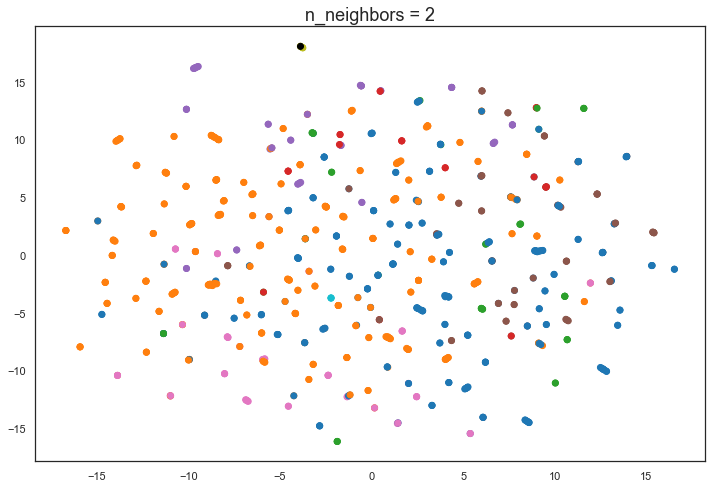

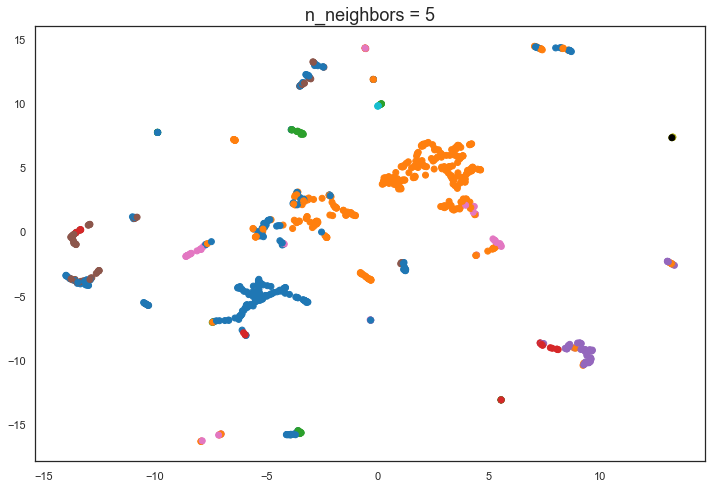

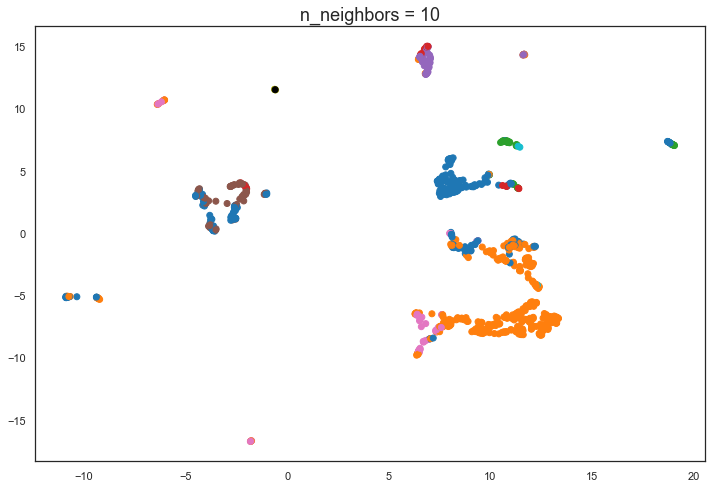

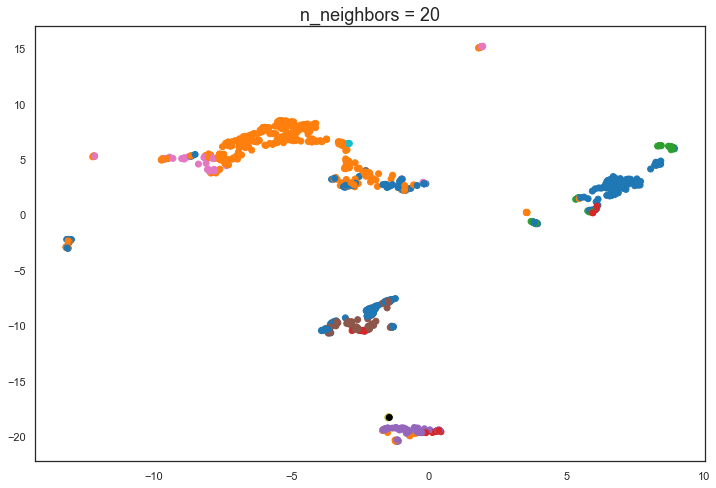

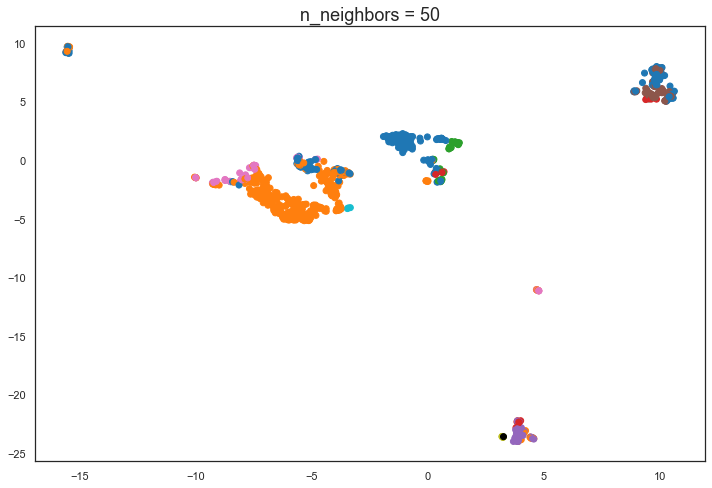

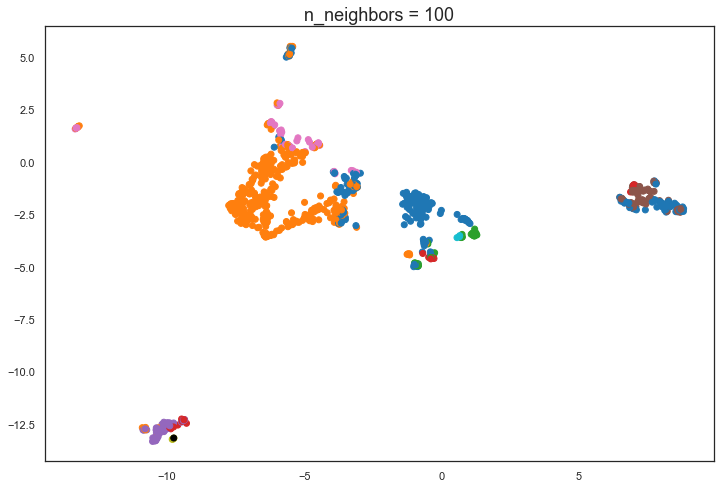

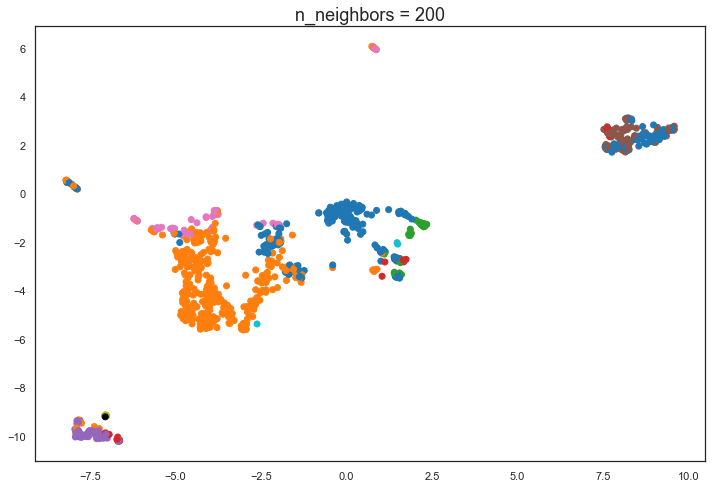

In [30]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))